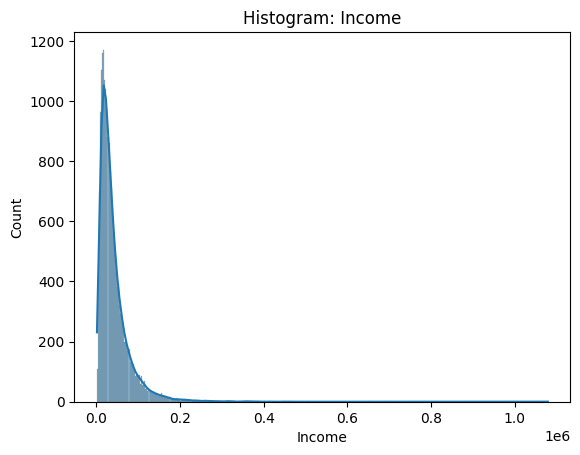

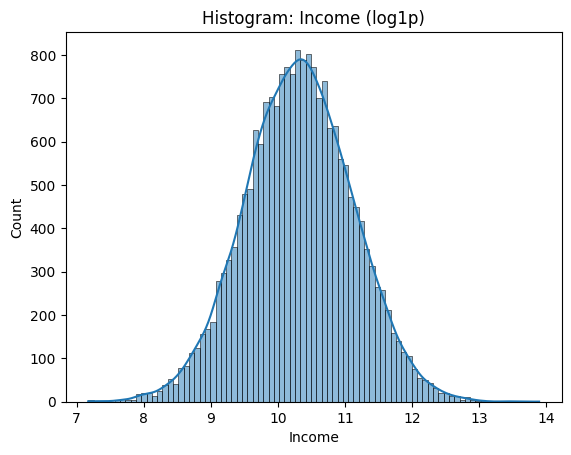

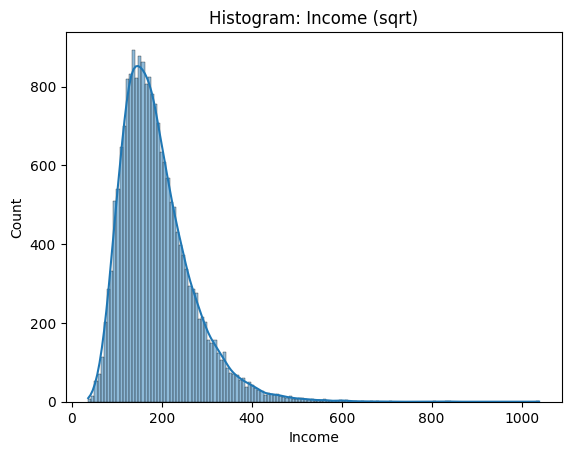

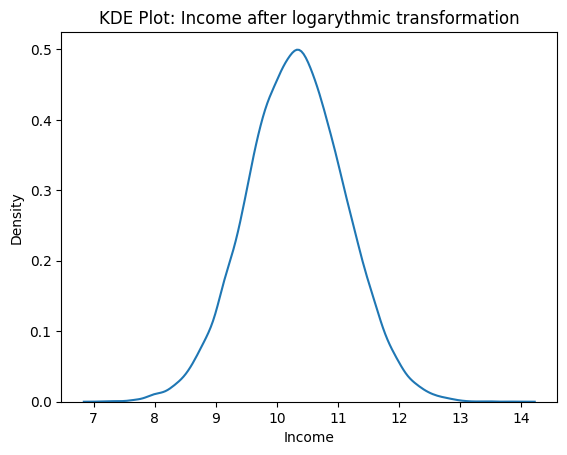

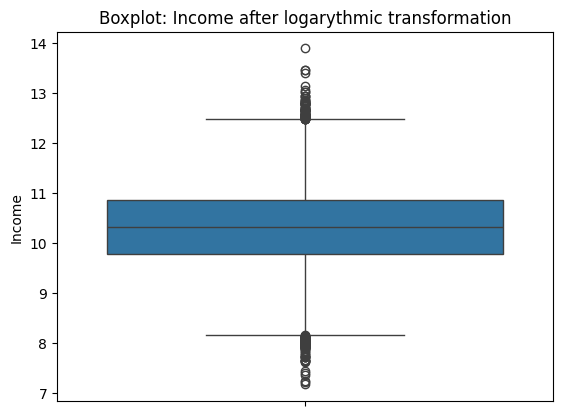

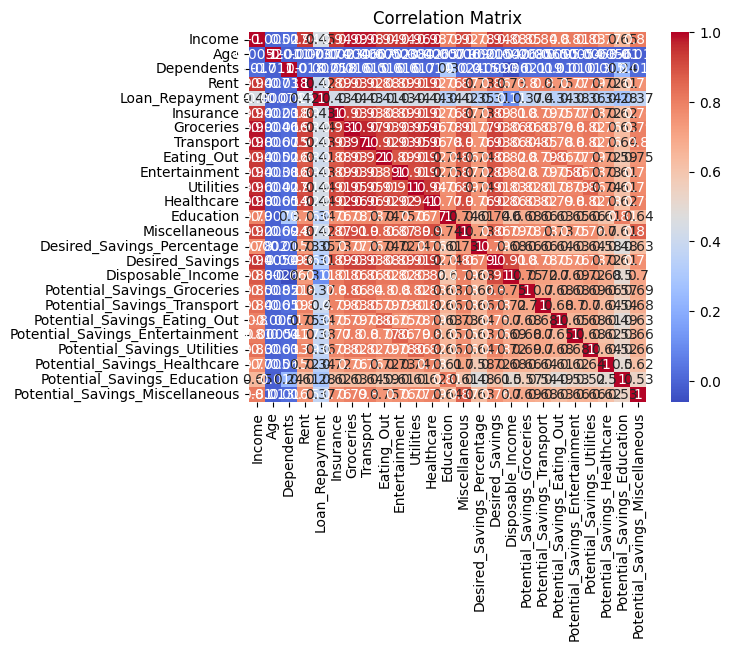

Income                             1.000000
Rent                               0.939370
Insurance                          0.944395
Groceries                          0.985717
Transport                          0.981955
Eating_Out                         0.939673
Entertainment                      0.943594
Utilities                          0.964414
Healthcare                         0.978838
Education                          0.794558
Miscellaneous                      0.919519
Desired_Savings_Percentage         0.776295
Desired_Savings                    0.944510
Disposable_Income                  0.881518
Potential_Savings_Groceries        0.851086
Potential_Savings_Transport        0.838267
Potential_Savings_Eating_Out       0.799650
Potential_Savings_Entertainment    0.812415
Potential_Savings_Utilities        0.832575
Potential_Savings_Healthcare       0.768083
Potential_Savings_Miscellaneous    0.805790
Name: Income, dtype: float64


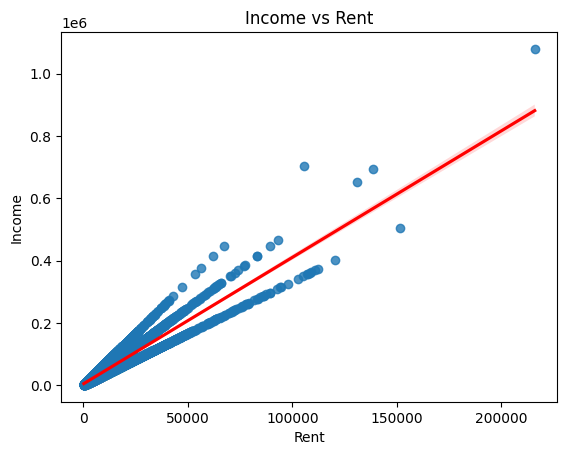

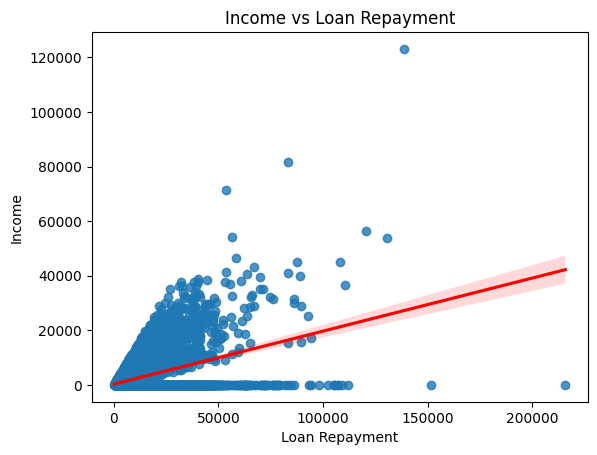

number of main components: 16
explained variane: [0.57296403 0.05202576 0.04605155 0.04594847 0.04334784 0.03443696
 0.03284479 0.02045871 0.01915847 0.01519989 0.01443943 0.01366119
 0.01238717 0.01154633 0.01145789 0.01053518]


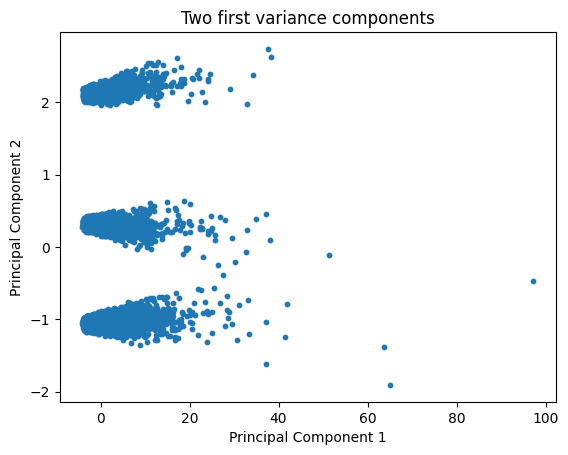

,Metric,Without PCA,With PCA
0,MSE,422.557277,594.745998
1,RMSE,20.556198,24.387415
2,MAE,11.987546,17.977176
3,r2,0.933127,0.905876


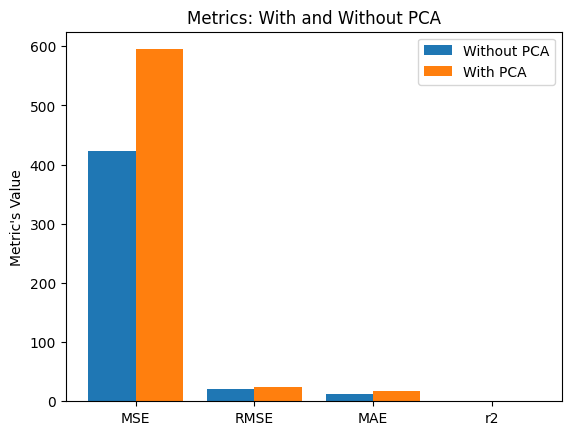

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

data = "data.csv"
df = pd.read_csv(data)

# basic info
# df.info()
# df.head()

# remove rows with missing values
df = df.dropna()

# descriptive statistics
# stats = df.describe()
# print(stats)

# apply sqrt and log1p transformations to Income
income_sqrt = np.sqrt(df.Income)
income_log = np.log1p(df.Income)

# histogram of Income (raw and transformed)
sns.histplot(df.Income, kde=True)
plt.title("Histogram: Income")
plt.show()

sns.histplot(income_log, kde=True)
plt.title("Histogram: Income (log1p)")
plt.show()

sns.histplot(income_sqrt, kde=True)
plt.title("Histogram: Income (sqrt)")
plt.show()

# identifying outliers (commented out)
# Q1 = df["Income"].quantile(0.25)
# Q3 = df["Income"].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers = df[(df["Income"] < lower_bound) | (df["Income"] > upper_bound)]

# use log1p transformed Income for further analysis
income_log = np.log1p(df.Income)

# KDE plot and boxplot of transformed Income
sns.kdeplot(income_log)
plt.title("KDE Plot: Income after logarithmic transformation")
plt.show()

sns.boxplot(income_log)
plt.title("Boxplot: Income after logarithmic transformation")
plt.show()

# correlation matrix with numerical features
correlation_matrix = df.select_dtypes(include=["int", "float"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# variables strongly correlated with Income
str_corr = correlation_matrix["Income"][abs(correlation_matrix["Income"]) > 0.7]
print(str_corr)

# visualizing relationships between Income and Rent / Loan Repayment
sns.regplot(x=df.Rent, y=df.Income, line_kws={"color": "red"})
plt.title("Income vs Rent")
plt.xlabel("Rent")
plt.ylabel("Income")
plt.show()

sns.regplot(x=df.Rent, y=df.Loan_Repayment, line_kws={"color": "red"})
plt.title("Income vs Loan Repayment")
plt.xlabel("Loan Repayment")
plt.ylabel("Income")
plt.show()

# encoding categorical variables
categorical_columns = df.select_dtypes(include=["object", "category"]).columns
df = pd.get_dummies(df, columns=categorical_columns, dtype="int", drop_first=True)

# feature matrix and target variable
X = df.drop(columns=["Income"])

# two possible target transformations
y = income_log
# y = income_sqrt

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# dimensionality reduction with PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# number of components selected by PCA
components = pca.n_components_
print(f"Number of principal components: {components}")

# explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

# scatterplot of the first two PCA components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], s=10)
plt.title("First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# linear regression model without PCA
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# linear regression model with PCA
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = lin_reg_pca.predict(X_test_pca)

# evaluation metrics without PCA
MSE = mean_squared_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# evaluation metrics with PCA
MSE_pca = mean_squared_error(y_test, y_pred_pca)
RMSE_pca = root_mean_squared_error(y_test, y_pred_pca)
MAE_pca = mean_absolute_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

# dataframe with model metrics
metrics = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "r2"],
    "Without PCA": [MSE, RMSE, MAE, r2],
    "With PCA": [MSE_pca, RMSE_pca, MAE_pca, r2_pca]
})
display(metrics)

# comparison chart for metrics
x = range(len(metrics["Metric"]))
plt.bar(x, metrics["Without PCA"], width=0.4, label="Without PCA")
plt.bar([i + 0.4 for i in x], metrics["With PCA"], width=0.4, label="With PCA")
plt.xticks([i + 0.2 for i in x], metrics["Metric"])
plt.title("Model Evaluation: With vs Without PCA")
plt.ylabel("Metric Value")
plt.legend()
plt.show()
